The purpose of this notebook is to briefly explort the Starbucks Drink Menu expanded and present a story through figures.

Since I am an avid coffee drinker the question I will ask is:
What type of beverage can I order that will provide the highest amount of caffeine for the fewest calories?
My first assumption for this question would be an espresso drink.

Import modules and set environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('white')

C:\Users\timos\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import data set, explore and clean.

In [2]:
data = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [3]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
data.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [6]:
data.columns = data.columns.str.lstrip()
data.columns = data.columns.str.rstrip()

In [7]:
data.isnull().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

In [8]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)

In [9]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float)

In [10]:
data.isna().sum()

Beverage_category           0
Beverage                    0
Beverage_prep               0
Calories                    0
Total Fat (g)               0
Trans Fat (g)               0
Saturated Fat (g)           0
Sodium (mg)                 0
Total Carbohydrates (g)     0
Cholesterol (mg)            0
Dietary Fibre (g)           0
Sugars (g)                  0
Protein (g)                 0
Vitamin A (% DV)            0
Vitamin C (% DV)            0
Calcium (% DV)              0
Iron (% DV)                 0
Caffeine (mg)              23
dtype: int64

In [11]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [13]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '32')

In [14]:
data['Total Fat (g)'] = data['Total Fat (g)'].astype('float64')

In [15]:
data['Vitamin A (% DV)'] = data['Vitamin A (% DV)'].str.replace('%','').astype('float64')
data['Vitamin C (% DV)'] = data['Vitamin C (% DV)'].str.replace('%','').astype('float64')
data['Calcium (% DV)'] = data['Calcium (% DV)'].str.replace('%','').astype('float64')
data['Iron (% DV)'] = data['Iron (% DV)'].str.replace('%','').astype('float64')

In [41]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

Subdivide data set for prefered Beverage category.

In [ ]:
classic_espresso = data[data['Beverage_category'] == 'Classic Espresso Drinks']

In [73]:
classic_espresso['Beverage_prep'].unique()

array(['Short Nonfat Milk', '2% Milk', 'Soymilk', 'Tall Nonfat Milk',
       'Grande Nonfat Milk', 'Venti Nonfat Milk', 'Short', 'Tall',
       'Grande', 'Venti', 'Solo', 'Doppio'], dtype=object)

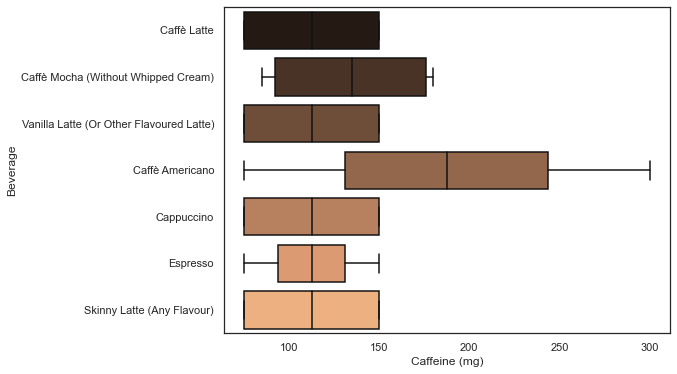

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Caffeine (mg)', y = 'Beverage', palette = 'copper', data = classic_espresso)
plt.show()

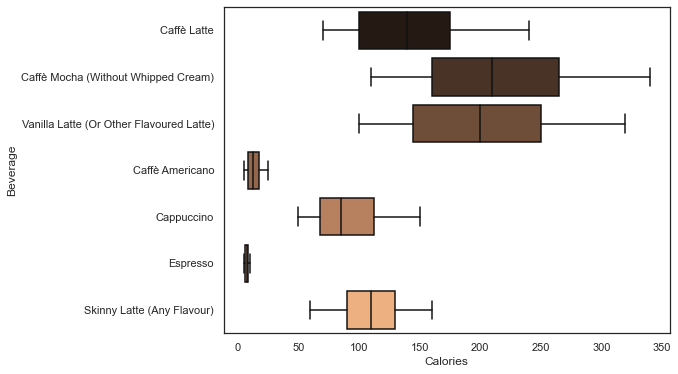

In [90]:
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Calories', y = 'Beverage', palette = 'copper', data = classic_espresso)
plt.show()

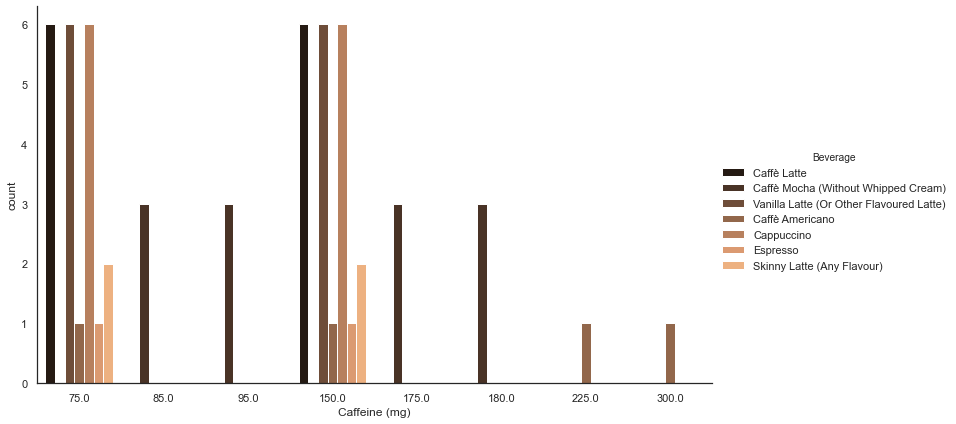

In [91]:
sns.catplot(x='Caffeine (mg)', 
            kind='count', 
            hue='Beverage', 
            palette = 'copper',
            data=classic_espresso, 
            height=6, 
            aspect=10/6)

As displayed in the figures above the beverage that provides the highest caffeine and the lowest calories is Caffe Americano. This is different than the first assumption of espresso.